In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import glob
from scipy import optimize
from scipy.special import erf
import os

In [2]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [3]:
cd /Users/austinmcdonald/Desktop/Xenon/Data/100/

/Users/austinmcdonald/Desktop/Xenon/Data/100


In [17]:
files = os.listdir()


In [18]:
files[4].split('.')[0].split('-')[-3].split('_')[0]

'100'

In [42]:
files

['Xe-100_P-03_E-080.txt',
 'Xe-100_P-09_E-150.txt',
 'Xe-100_P-03_E-040.txt',
 'Xe-100_P-01_E-200.txt',
 'Xe-100_P-09_E-350.txt',
 'Xe-100_P-11_E-250.txt',
 'Xe-100_P-06_E-300.txt',
 '.DS_Store',
 'Xe-100_P-11_E-080.txt',
 'Xe-100_P-03_E-250.txt',
 'Xe-100_P-06_E-100.txt',
 'Xe-100_P-09_E-250.txt',
 'Xe-100_P-01_E-100.txt',
 'Xe-100_P-11_E-150.txt',
 'Xe-100_P-06_E-200.txt',
 'Xe-100_P-03_E-150.txt',
 'Xe-100_P-09_E-080.txt',
 'Xe-100_P-01_E-080.txt',
 'Xe-100_P-03_E-200.txt',
 'Xe-100_P-06_E-150.txt',
 'Xe-100_P-09_E-100.txt',
 'Xe-100_P-01_E-250.txt',
 'Xe-100_P-09_E-300.txt',
 'Xe-100_P-11_E-200.txt',
 'Xe-100_P-03_E-300.txt',
 'Xe-100_P-06_E-250.txt',
 'Xe-100_P-03_E-100.txt',
 'Xe-100_P-03_E-060.txt',
 'Xe-100_P-06_E-080.txt',
 'Xe-100_P-11_E-300.txt',
 'Xe-100_P-09_E-200.txt',
 'Xe-100_P-01_E-150.txt',
 'Xe-100_P-11_E-100.txt']

In [51]:
Data = np.loadtxt('Xe-100_P-06_E-100.txt')

In [53]:
D1 = np.loadtxt('Xe-100_P-01_E-100.txt')
D3 = np.loadtxt('Xe-100_P-03_E-100.txt')
D6 = np.loadtxt('Xe-100_P-06_E-100.txt')
D9 = np.loadtxt('Xe-100_P-09_E-100.txt')
D11= np.loadtxt('Xe-100_P-11_E-100.txt')

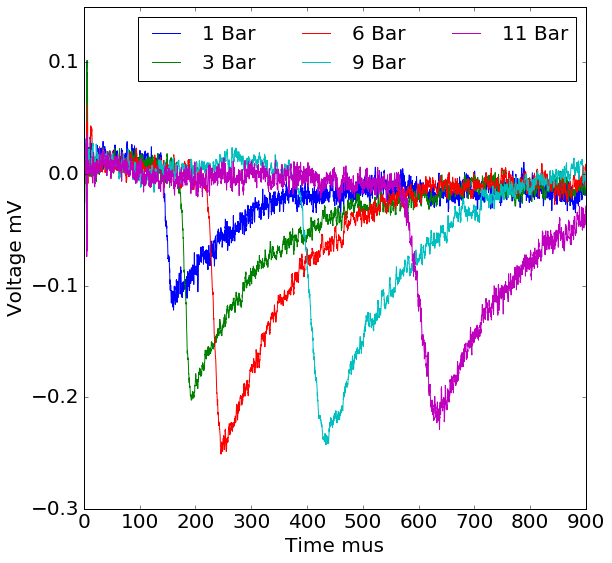

In [69]:
plt.figure(figsize=(9,9))
#plt.plot(Data[0]*1e6,Data[1]*1e3,label='GOLD')
#plt.plot(Data[0]*1e6,Data[2]*1e3,label='ANODE')
n = 10
plt.plot(moving_average(D1[0]*1e6,n),moving_average(D1[2]*1e3,n),label='1 Bar')
plt.plot(moving_average(D3[0]*1e6,n),moving_average(D3[2]*1e3,n),label='3 Bar')
plt.plot(moving_average(D6[0]*1e6,n),moving_average(D6[2]*1e3,n),label='6 Bar')
plt.plot(moving_average(D9[0]*1e6,n),moving_average(D9[2]*1e3,n),label='9 Bar')
plt.plot(moving_average(D11[0]*1e6,n),moving_average(D11[2]*1e3,n),label='11 Bar')



plt.xlim(0,900)
plt.ylim(-0.3,.15)
plt.legend(loc="upper right",fontsize=20,ncol=3)
plt.xlabel("Time mus",fontsize=20)
plt.ylabel("Voltage mV",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [31]:
Data = np.loadtxt(files[-10])

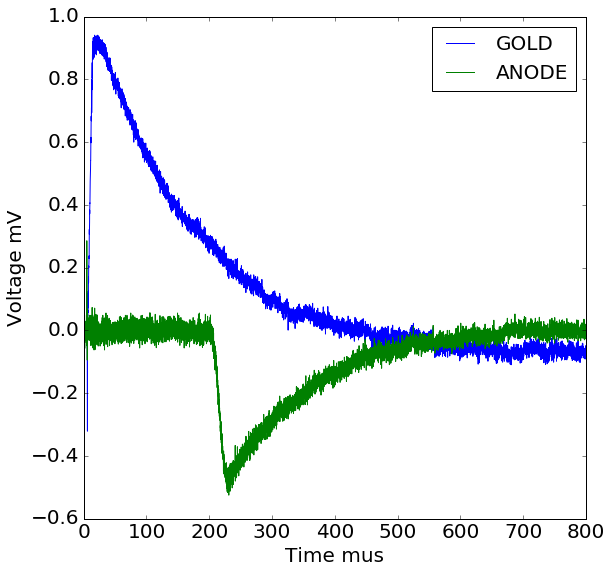

In [41]:
plt.figure(figsize=(9,9))
plt.plot(Data[0]*1e6,Data[1]*1e3,label='GOLD')
plt.plot(Data[0]*1e6,Data[2]*1e3,label='ANODE')
plt.xlim(0,800)
plt.ylim(-0.6,1)
plt.legend(loc="upper right",fontsize=20)
plt.xlabel("Time mus",fontsize=20)
plt.ylabel("Voltage mV",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [26]:
def FIND_MAX(X,Y):
    TriggerTime = find_nearest(X,0)
    Trigger     = np.where(X==TriggerTime)[0][0]+5
    xx = moving_average(X,20)
    yy = moving_average(Y,20)
    
    xxx = xx[Trigger:]
    yyy = yy[Trigger:]
    
    maxy = max(yyy)
    
    hold      = find_nearest(yyy,maxy)
    peak     = np.where(yyy==hold)[0][0]

    xxx = xx[Trigger:Trigger+peak]
    yyy = yy[Trigger:Trigger+peak]
    
    hold      = find_nearest(yyy,maxy*0.1)
    edge     = np.where(yyy==hold)[0][0]
    return Trigger+peak, Trigger+edge

def FIND_MIN(X,Y):
    TriggerTime = find_nearest(X,0)
    Trigger     = np.where(X==TriggerTime)[0][0]+20
    xx = moving_average(X,20)
    yy = moving_average(Y,20)
    
    xxx = xx[Trigger:]
    yyy = yy[Trigger:]
    
    miny = min(yyy)
    
    hold      = find_nearest(yyy,miny)
    MINLOC     = np.where(yyy==hold)[0][0]
    
    TT = Trigger+MINLOC
    xxxx = xx[Trigger:TT]
    yyyy = yy[Trigger:TT]
    
    hold      = find_nearest(yyyy,miny*0.1)
    REDGE     = np.where(yyyy==hold)[0][0]
    return MINLOC+Trigger,miny,REDGE+Trigger

0.00016920000197728793

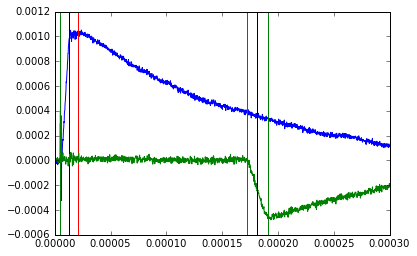

In [8]:
plt.plot(Data[0],Data[1])
pp,ee = FIND_MAX(Data[0],Data[1])
plt.axvline(Data[0][pp],color='r')
plt.axvline(Data[0][ee],color='g')
I = ee + int((pp-ee)/2)
plt.axvline(Data[0][I],color='k')

plt.plot(Data[0],Data[2])
MM, MIN, RE = FIND_MIN(Data[0],Data[2])
plt.axvline(Data[0][RE],color='r')
plt.axvline(Data[0][MM],color='g')
I2 = RE + int((MM-RE)/2)
plt.axvline(Data[0][I2],color='k')

plt.xlim(0,0.0003)

Data[0][I2]-Data[0][I]

In [9]:
def func(t,t0,sig,a,tau):
    #tau = 150e-6
    A = (sig**2-2*(t-t0)*tau)/(2*tau**2)
    B = (-sig**2 +(t-t0)*tau)/(np.sqrt(2)*tau*sig)
    C = np.exp(A)
    D = (1 + erf(B))
    E = a*C*D
    return E

In [60]:
def FITTER_GOLD(x,y):
    avg=50
    YY = moving_average(y,avg)
    XX = moving_average(x,avg)
    pp,ee = FIND_MAX(XX,YY)
    I = ee + int((pp-ee)/2)
    MM = max(YY[I:])
    
    fitval = [XX[I],8e-6, MM,150e-6]

    errfunc = lambda p, x, y: (func(x, *p) - y)**2
    optim, success = optimize.leastsq(errfunc, fitval, args=(XX,YY))
    return XX,YY,optim

In [106]:
def FITTER_ANOD(x,y):
    avg=50
    YY = moving_average(y,avg)
    XX = moving_average(x,avg)
    MM, MIN, RE = FIND_MIN(Data[0],Data[2])
    I2 = RE + int((MM-RE)/2)
    MM = min(YY[I2:])
    SIG = abs(x[MM]-x[RE])
    
    fitval = [XX[I2],8e-6, MM,120e-6]
    #fitval = [XX[I],SIG, MM,150e-6]

    errfunc = lambda p, x, y: (func(x, *p) - y)**2
    optim, success = optimize.leastsq(errfunc, fitval, args=(XX,YY))
    return XX,YY,optim
    #return SIG

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


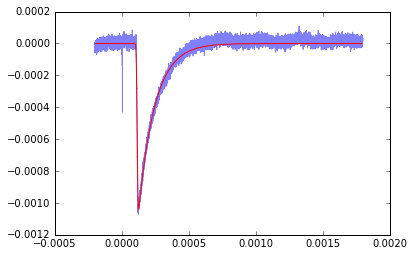

array([  1.15517383e-04,   4.97939319e-06,  -5.77265861e-04,
         1.22037037e-04])

In [62]:
plt.plot(Data[0],Data[2],alpha=0.5)
X,Y,O = FITTER_ANOD(Data[0],Data[2])
plt.plot(X,func(X,*O),color='r')
plt.show()
O

In [55]:
success

1

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(0, 0.001)

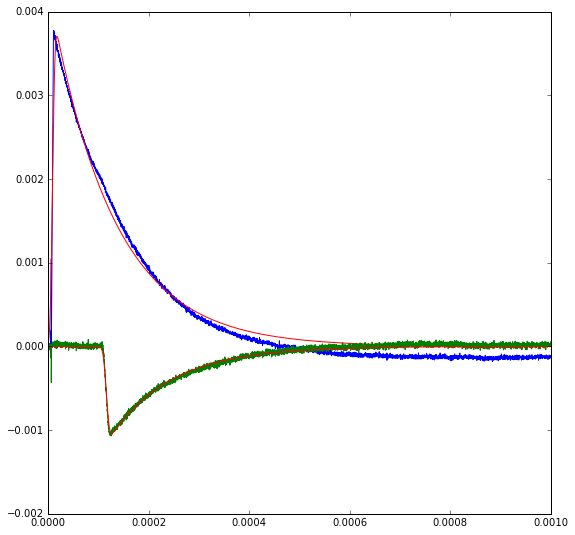

In [63]:
plt.figure(figsize=(9,9))
plt.plot(Data[0],Data[1])
X,Y,O = FITTER_GOLD(Data[0],Data[1])
plt.plot(X,func(X,*O),color='r')
plt.plot(Data[0],Data[2])
X,Y,O = FITTER_ANOD(Data[0],Data[2])
plt.plot(X,func(X,*O),color='r')
plt.xlim(0,0.001)

In [140]:
PATH = '/Users/austinmcdonald/Desktop/Xenon/Data/'
folders = glob.glob(PATH+"*/")
folders.sort()
folders

['/Users/austinmcdonald/Desktop/Xenon/Data/000/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/002/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/003/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/008/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/015/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/035/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/050/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/065/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/085/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/095/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/099/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/100/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/35-S/']

In [141]:
folders = [folders[0],folders[1],folders[3],folders[4],folders[10],folders[11],folders[12]]
folders

['/Users/austinmcdonald/Desktop/Xenon/Data/000/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/002/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/008/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/015/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/099/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/100/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/35-S/']

In [210]:
# arrival, sigma, max, RC
GOLDD = []
ANODE = []
for F in range(0,len(folders)):
    files = os.listdir(folders[F])
    if '.DS_Store' in files: files.remove('.DS_Store')
    for fi in files:
        Data = np.loadtxt(folders[F]+fi)
        XG,YG,OG = FITTER_GOLD(Data[0],Data[1])
        XA,YA,OA = FITTER_ANOD(Data[0],Data[2])
        A = 100e-6
        B = 200e-6
        EE =int(fi.split('.')[0].split('-')[-1])
        PP = int(fi.split('.')[0].split('-')[-3].split('_')[0])
        #ANODE.append(OA)
        #GOLDD.append(OG)
        #if A<OG[3]<B and A<OA[3]<B and EE != 80 and EE != 100:
        if PP != 100 and PP != 99:
            ANODE.append(OA)
            GOLDD.append(OG)
        if PP != 100 and PP != 99 and OG[3]>135e-6 or OA[3]>135e-6:
        #if OG[3]>140e-6 or OA[3]>140e-6:
            print(fi)


//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Xe-099_P-0601_E-100.txt
Xe-099_P-0302_E-250.txt
Xe-099_P-0302_E-040.txt
Xe-099_P-0901_E-080.txt
Xe-099_P-0995_E-250.txt
Xe-099_P-0601_E-080.txt
Xe-099_P-0601_E-250.txt
Xe-100_P-0607_E-150.txt
Xe-100_P-1080_E-080.txt
Xe-100_P-0302_E-100.txt
Xe-100_P-0302_E-060.txt
Xe-100_P-0607_E-080.txt
Xe-100_P-0101_E-100.txt
Xe-100_P-1080_E-250.txt
Xe-100_P-0101_E-250.txt
Xe-100_P-1080_E-300.txt
Xe-100_P-1080_E-100.txt
Xe-100_P-0302_E-040.txt
Xe-100_P-0607_E-300.txt
Xe-100_P-0607_E-100.txt
Xe-100_P-0302_E-150.txt
Xe-035_P-01_E-080.txt
Xe-035_P-11_E-080.txt
Xe-035_P-06_E-200.txt


In [218]:
GOLDD = np.array(GOLDD)
ANODE = np.array(ANODE)

In [219]:
print("mean gold leaving = ",np.mean(GOLDD[:,0]*1e6))
print("STD gold leaving = ",np.std(GOLDD[:,0]*1e6))
print("mean gold RC = ",np.mean(GOLDD[:,3]*1e6))
print("STD gold RC = ",np.std(GOLDD[:,3]*1e6))
print("\n")
print("\n")
print("mean anode leaving = ",np.mean(ANODE[:,0]*1e6))
print("STD anode leaving = ",np.std(ANODE[:,0]*1e6))
print("mean anode RC = ",np.mean(ANODE[:,3]*1e6))
print("STD anode RC = ",np.std(ANODE[:,3]*1e6))

mean gold leaving =  8.15656259316
STD gold leaving =  0.382550129745
mean gold RC =  122.586593565
STD gold RC =  2.01797773954




mean anode leaving =  108.466678713
STD anode leaving =  24.587595936
mean anode RC =  123.500805872
STD anode RC =  4.98047815489


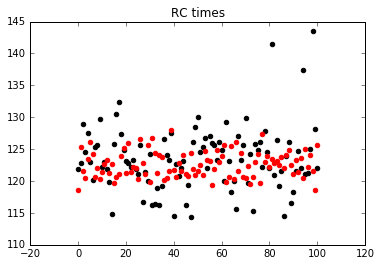

In [220]:
xval = np.arange(len(ANODE[:,3]*1e6))
plt.title("RC times")
plt.scatter(xval,ANODE[:,3]*1e6,color='k')
plt.scatter(xval,GOLDD[:,3]*1e6,color='r')
#plt.ylim(100,200)

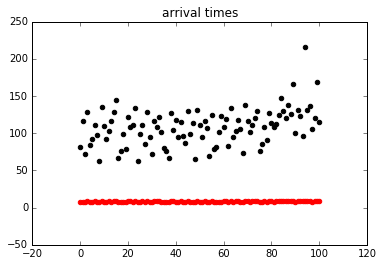

In [222]:
xval = np.arange(len(ANODE[:,3]))
plt.title("arrival times")
plt.scatter(xval,ANODE[:,0]*1e6,color='k')
plt.scatter(xval,GOLDD[:,0]*1e6,color='r')
#plt.ylim(100,200)

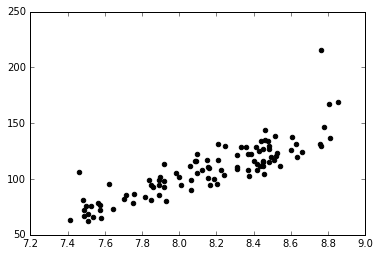

In [223]:
plt.scatter(GOLDD[:,0]*1e6,ANODE[:,0]*1e6,color='k')
#plt.scatter(xval,GOLDD[:,0]*1e6,color='r')
#plt.ylim(100,200)

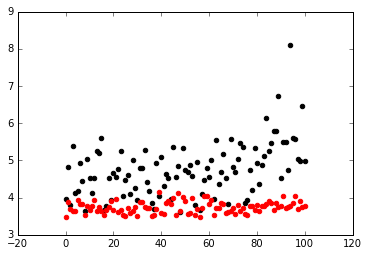

In [224]:
xval = np.arange(len(ANODE[:,3]))
#plt.title("RC times")
plt.scatter(xval,ANODE[:,1]*1e6,color='k')
plt.scatter(xval,GOLDD[:,1]*1e6,color='r')
#plt.ylim(100,200)

In [ ]:
####Xe-008_P-01_E-100.txt
#Xe-099_P-0302_E-250.txt
#Xe-099_P-0302_E-040.txt
#Xe-099_P-0901_E-080.txt
#Xe-099_P-0995_E-250.txt
#Xe-099_P-0601_E-250.txt
#Xe-100_P-1080_E-080.txt
#Xe-100_P-0302_E-100.txt
#Xe-100_P-0101_E-100.txt
#Xe-100_P-1080_E-250.txt
#Xe-100_P-0101_E-250.txt
##Xe-100_P-1080_E-300.txt
#Xe-100_P-1080_E-100.txt
#Xe-100_P-0302_E-040.txt
#Xe-100_P-0607_E-300.txt
#Xe-035_P-01_E-080.txt
#Xe-035_P-06_E-200.txt

In [ ]:
Xe-035_P-01_E-080.txt
Xe-035_P-11_E-080.txt
Xe-035_P-06_E-200.txt

In [282]:
PATH = '/Users/austinmcdonald/Desktop/Xenon/Data/100/'
PP = "Xe-100_P-0909_E-200.txt"
Data = np.loadtxt(PATH+PP)

[  1.13063497e-05   4.75471431e-06   5.19275362e-04   1.26485334e-04]
[  2.00390254e-04   7.03031066e-06  -2.60011880e-04   1.31951062e-04]


//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


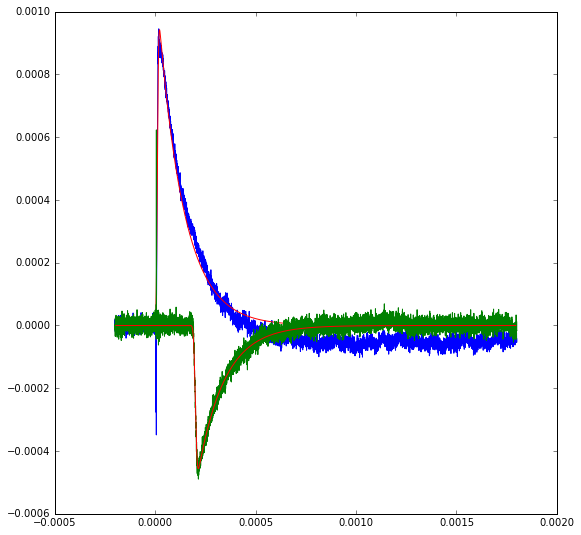

In [283]:
plt.figure(figsize=(9,9))
plt.plot(Data[0],Data[1])
X,Y,O = FITTER_GOLD(Data[0],Data[1])
print(O)
plt.plot(X,func(X,*O),color='r')
plt.plot(Data[0],Data[2])
X,Y,O = FITTER_ANOD(Data[0],Data[2])
print(O)
plt.plot(X,func(X,*O),color='r')
#plt.xlim(0,0.001)

In [284]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [285]:
#plt.plot(Data[0],Data[1])
X,Y,O = FITTER_GOLD(Data[0],Data[1])
O

array([  1.13063497e-05,   4.75471431e-06,   5.19275362e-04,
         1.26485334e-04])

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(-1e-05, 0.0003)

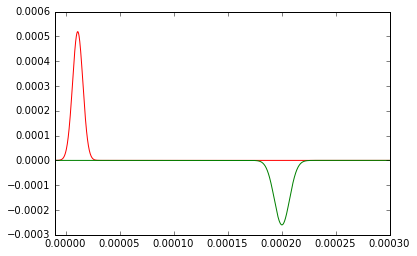

In [286]:
# arrival, sigma, max, RC
xval = np.linspace(-.0001,0.002,10000)

X,Y,O = FITTER_GOLD(Data[0],Data[1])
plt.plot(xval,gaus(xval,O[2],O[0],O[1]),color='r')
X,Y,O = FITTER_ANOD(Data[0],Data[2])
plt.plot(xval,gaus(xval,O[2],O[0],O[1]),color='g')
plt.xlim(-1e-5,3e-4)

4.75471431319e-06
7.0303106598e-06


//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(-1e-05, 1e-05)

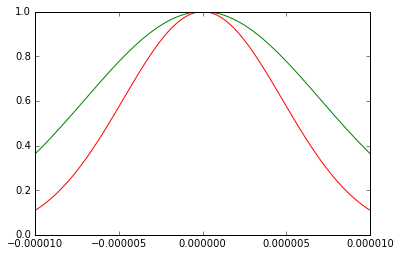

In [287]:
X,Y,O = FITTER_GOLD(Data[0],Data[1])
plt.plot(xval,gaus(xval,1,0,O[1]),color='r')
print(O[1])
X,Y,O = FITTER_ANOD(Data[0],Data[2])
plt.plot(xval,abs(gaus(xval,1,0,O[1])),color='g')
print(O[1])
plt.xlim(-1e-5,1e-5)

In [288]:
(7.0303106598e-06-4.75471431319e-06)*1e6


2.27559634661

In [268]:
(6.13364779471e-06)*1e6*13.8

84.64433956699801